### 0、导入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']#设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False #正常显示负号
import pymysql
import pandas as pd

### 1、利用pymysql提取数据库数据

In [3]:
mydb = pymysql.connect(
    host='rm-ro.mysql.rds.aliyuncs.com',
    user='d',
    database='d',
    passwd='D'
)
print(mydb)
#创建一个连接对象mydb，并传入数据库相关参数

In [4]:
cursor = mydb.cursor(pymysql.cursors.DictCursor)
#创建游标对象

In [5]:
sql = '''
select  *
from    ddm.shop
where   month(日期) in (6,7)
    '''
#execute执行sql操作
cursor.execute(sql)
#fetchall 将所有查询结果返回给 result
result = cursor.fetchall()
#将result转换为dataframe类型，并命名为shop
shop = pd.DataFrame(result)

### 2、了解数据

In [6]:
shop.info()#可以看到个别字段存在空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   品牌ID    310 non-null    int64  
 1   品牌名称    310 non-null    object 
 2   城市      310 non-null    object 
 3   平台      310 non-null    object 
 4   日期      310 non-null    object 
 5   门店ID    310 non-null    int64  
 6   门店名称    310 non-null    object 
 7   GMV     310 non-null    float64
 8   下单人数    215 non-null    float64
 9   商家实收    310 non-null    int64  
 10  商户补贴    310 non-null    int64  
 11  平台补贴    310 non-null    int64  
 12  无效订单数   310 non-null    int64  
 13  曝光人数    215 non-null    float64
 14  有效订单数   310 non-null    int64  
 15  进店人数    215 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory usage: 38.9+ KB


In [7]:
shop.fillna(0,inplace=True) #我们采用fillna进行0值填充
shop.info()#再次查看

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   品牌ID    310 non-null    int64  
 1   品牌名称    310 non-null    object 
 2   城市      310 non-null    object 
 3   平台      310 non-null    object 
 4   日期      310 non-null    object 
 5   门店ID    310 non-null    int64  
 6   门店名称    310 non-null    object 
 7   GMV     310 non-null    float64
 8   下单人数    310 non-null    float64
 9   商家实收    310 non-null    int64  
 10  商户补贴    310 non-null    int64  
 11  平台补贴    310 non-null    int64  
 12  无效订单数   310 non-null    int64  
 13  曝光人数    310 non-null    float64
 14  有效订单数   310 non-null    int64  
 15  进店人数    310 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory usage: 38.9+ KB


In [8]:
shop.head() #查看数据内容

,品牌ID,品牌名称,城市,平台,日期,门店ID,门店名称,GMV,下单人数,商家实收,商户补贴,平台补贴,无效订单数,曝光人数,有效订单数,进店人数
0,4636,蛙小辣火锅杯（总账号）,上海,eleme,2020-07-27,2001104355,宝山店,63.0,1.0,23,35,0,0,151.0,1,17.0
1,4636,蛙小辣火锅杯（总账号）,上海,eleme,2020-07-19,2001104355,宝山店,312.0,5.0,107,177,17,0,1000.0,5,60.0
2,4636,蛙小辣火锅杯（总账号）,上海,eleme,2020-06-13,2001104355,宝山店,684.0,10.0,265,356,14,0,1230.0,10,70.0
3,4636,蛙小辣火锅杯（总账号）,上海,eleme,2020-06-23,2001104355,宝山店,557.0,11.0,168,328,11,0,899.0,11,62.0
4,4636,蛙小辣火锅杯（总账号）,上海,eleme,2020-06-21,2001104355,宝山店,624.0,11.0,239,317,12,0,1287.0,11,73.0


### 3、练习
一：各平台在6、7月的GMV占比  
二：6、7月各周的总GMV情况  
三：6、7月各周的转化率情况  
四：查看6、7月每天各个门店的GMV，门店实收，并按照门店实收进行排名。（输出字段：日期-门店名称-GMV-门店实收-排名）

([<matplotlib.patches.Wedge at 0x1f645d017f0>,
 [Text(-0.547826998539216, 0.9538792269839584, '饿了么'),
  Text(0.5478269985392162, -0.9538792269839582, '美团')],
 [Text(-0.29881472647593593, 0.5202977601730682, '66.6%'),
  Text(0.2988147264759361, -0.5202977601730681, '33.4%')])

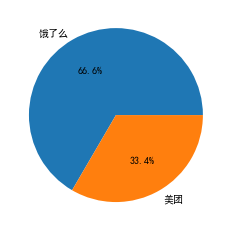

In [9]:
#绘制出，各平台在6、7月的GMV占比 （饼图）
pin_tai = shop[['平台','GMV']].groupby('平台').agg(GMV = ('GMV','sum'))
#我们按照平台进行分组，对GMV进行聚合
pin_tai = pd.Series(pin_tai.GMV,index=pin_tai.index)
#将DataFrame类型转换为Series类型
plt.pie(pin_tai,autopct='%2.1f%%',labels=['饿了么','美团'])
#调用pie方法，传入数据pin_tai；autopct：数据标签；%2.1f 输出宽度为2的浮点数，小数点宽度为1；labels 为标签

6、7月的总GMV当中，饿了么占比66%，美团占比33%

In [10]:
#绘制出6-7月的GMV
shop.日期 = pd.to_datetime(shop.日期)
#先对日期格式转换为datetime64格式，方便我们对日期进行采样操作
shop['下单率'] = shop.下单人数/shop.进店人数
shop['进店率'] = shop.进店人数/shop.曝光人数
#分别创建字段：下单率&进店率

In [11]:
gmv_rates = shop.groupby(shop.日期).agg(GMV总合 = ('GMV','sum'),进店率 = ('进店率','sum'),下单率 = ('下单率','sum')).resample('1W').asfreq().dropna(how = 'any')
gmv_rates
#groupby日期--按照日期进行分组
#agg--分别对gmv,进店率,下单率进行sum聚合
#resample--让groupby以1周为单位的进行数据的分组
#asfreq--让resample生效
#dropna--删除掉有空值的行

,GMV总合,进店率,下单率
日期,,,
2020-06-07,9995.0,0.206191,0.605541
2020-06-14,7494.0,0.229990,0.569144
2020-06-21,5315.0,0.201604,0.452098
2020-06-28,7268.0,0.220086,0.712623
2020-07-05,5773.0,0.307283,0.887202
2020-07-12,6951.0,0.257386,0.875181
2020-07-19,7089.0,0.286398,0.717871
2020-07-26,7963.0,0.235892,0.763889


(array([18421., 18428., 18435., 18444., 18451., 18458., 18465.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

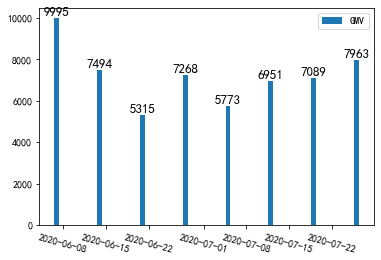

In [12]:
plt.bar(gmv_rates.index, gmv_rates.GMV总合, label = 'GMV')
#bar--条形图
#x横坐标为gmv_rates的索引，y纵坐标为gmv_rates的GMV总合
#label--标签名：GMV
plt.legend()
#显示标签
for a,b in zip(gmv_rates.index,gmv_rates.GMV总合):
    plt.text(a,b+0.1,'%.0f'%b,ha='center',va='bottom',fontsize=13)
plt.xticks(rotation=-15)
#a,b 分别遍历 gmv_rates的index，gmv_rates的GMV总合的内容
#zip--生成(a[0],b[0]),(a[1],b[1]).....我们将它们看作是位置的坐标
#a,b+0.1--放入我们的坐标
#'%.0f'%b--在坐标位置，显示我们的b的值，作为标签
#ha、va 调整标签的位置

6月份前3周的GMV整体呈下降趋势，第四周上升回归；7月份各周的GMV整体呈上升趋势。

(array([18421., 18428., 18435., 18444., 18451., 18458., 18465.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

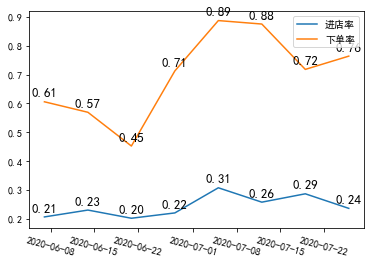

In [13]:
plt.plot(gmv_rates.index, gmv_rates.进店率,label = '进店率')
plt.plot(gmv_rates.index, gmv_rates.下单率,label = '下单率')
plt.legend()

for a,b in zip(gmv_rates.index, gmv_rates.进店率):
    plt.text(a,b+0.01,'%.2f'%b,ha='center',va='bottom',fontsize=13)
for a,b in zip(gmv_rates.index, gmv_rates.下单率):
    plt.text(a,b+0.01,'%.2f'%b,ha='center',va='bottom',fontsize=13)
plt.xticks(rotation=-15)

6-7月的进店率整体浮动稳点，其中7月的第一周进店率最高，为31%  
6月前3周的下单率呈下降趋势，其中第三周最低为45%，第四周上升回归；7月份第一周下单率为上升趋势且为2个月当中的最高89%，第三周呈下降趋势，第四周上升回归

In [14]:
#请筛选出6、7月每天各个门店的GMV，门店实收，并按照门店实收进行排名。
#输出字段：日期-门店名称-GMV-门店实收-排名
gmv_incount = '''
select  s.日期
        ,s.门店名称
        ,s.GMV
        ,c.门店实收
        ,rank() over (partition by 日期 order by 门店实收 desc) as rankk
from    ddm.cpc c
right join ddm.shop s
on      c.日期 = s.日期
and     c.门店ID=s.门店ID
where   month(s.日期) in (6,7)
order by s.日期,c.门店实收 desc
    '''
#execute执行操作
cursor.execute(gmv_incount)
result2 = cursor.fetchall()
shop2 = pd.DataFrame(result2)
shop2

,日期,门店名称,GMV,门店实收,rankk
0,2020-06-01,拌客干拌麻辣烫(武宁路店),8848.0,2992.13,1
1,2020-06-01,宝山店,1131.0,469.75,2
2,2020-06-01,宝山店,1093.0,436.20,3
3,2020-06-01,五角场店,0.0,NaN,4
4,2020-06-01,怒江路店,0.0,NaN,4
...,...,...,...,...,...
305,2020-07-31,拌客干拌麻辣烫(武宁路店),3920.0,1079.26,1
306,2020-07-31,拌客干拌麻辣烫(武宁路店),3745.0,995.88,2
307,2020-07-31,宝山店,1853.0,731.42,3
308,2020-07-31,宝山店,1177.0,438.69,4
